1. Dataset Selection & Exploration

In [21]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

In [2]:
# Load dataset
df = pd.read_csv('/content/onlinefoods.csv')
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [3]:
# Display basic information about the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [4]:
# Check for missing values
print(df.isnull().sum())

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64


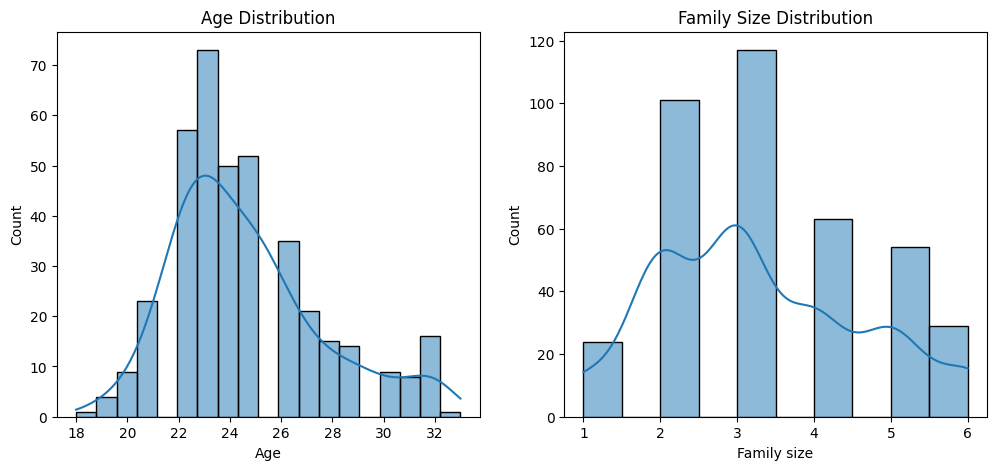

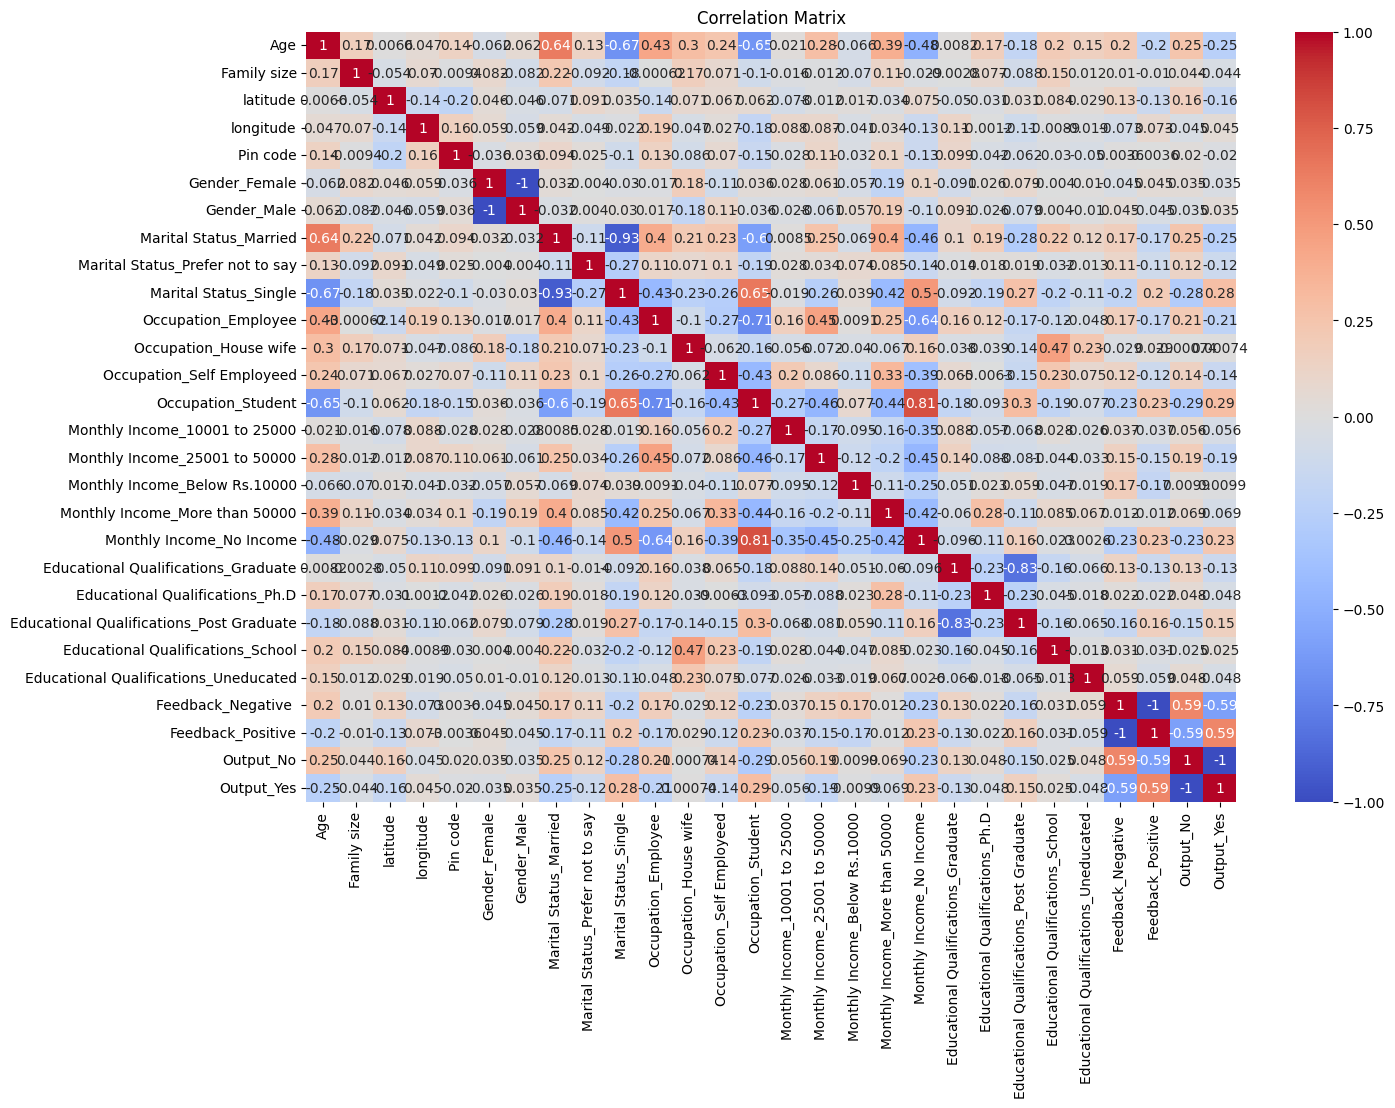

In [22]:
data_cleaned = df.drop(columns=['Unnamed: 12'])
data_encoded = pd.get_dummies(data_cleaned, columns=[
    'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
    'Educational Qualifications', 'Feedback', 'Output'
])

#Plot distributions of age and family size
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data_encoded['Age'], kde=True)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data_encoded['Family size'], kde=True)
plt.title('Family Size Distribution')

plt.show()

# Plot correlation matrix
plt.figure(figsize=(15, 10))
correlation_matrix = data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

3. Model Training & Comparison

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Handling missing values
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])

# Encoding categorical variables
categorical_features = ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Feedback']
numerical_features = ['Age', 'Family size', 'latitude', 'longitude']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Splitting the dataset into training and testing sets
X = df.drop('Output', axis=1)
y = df['Output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

Logistic Regression Metrics:
Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.13
Root Mean Squared Error (RMSE): 0.36
R-squared (R²): 0.02
Logistic Regression Cross-Validation Accuracy: 0.87 (+/- 0.04)
Random Forest Cross-Validation Accuracy: 0.91 (+/- 0.04)
KNN Cross-Validation Accuracy: 0.82 (+/- 0.05)
Random Forest Accuracy: 0.88
              precision    recall  f1-score   support

          No       0.64      0.58      0.61        12
         Yes       0.93      0.94      0.93        66

    accuracy                           0.88        78
   macro avg       0.78      0.76      0.77        78
weighted avg       0.88      0.88      0.88        78

KNN Accuracy: 0.87
              precision    recall  f1-score   support

          No       0.62      0.42      0.50        12
         Yes       0.90      0.95      0.93        66

    accuracy                           0.87        78
   macro avg       0.76      0.69      0.71        78
weighted avg       0.86      0.87   

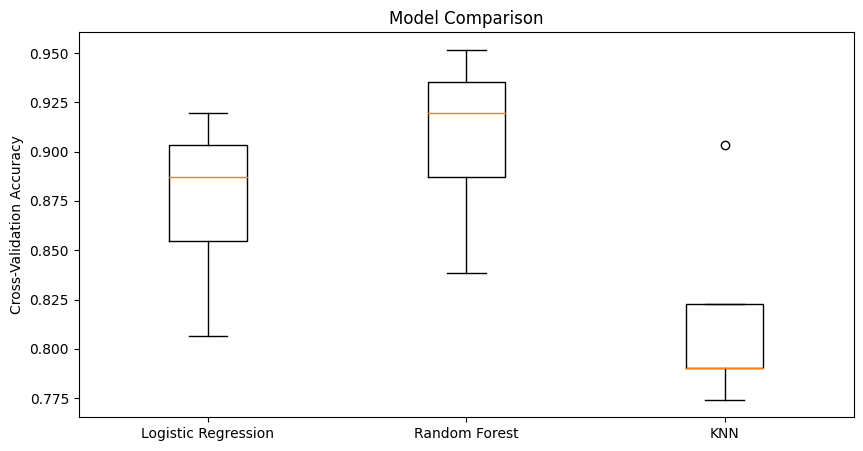

Random Forest Accuracy: 0.90
              precision    recall  f1-score   support

          No       0.70      0.58      0.64        12
         Yes       0.93      0.95      0.94        66

    accuracy                           0.90        78
   macro avg       0.81      0.77      0.79        78
weighted avg       0.89      0.90      0.89        78



In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import math
import matplotlib.pyplot as plt

# Contoh data (ganti dengan data Anda)
# X_train, X_test, y_train, y_test

# Encode target labels with value between 0 and n_classes-1
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Train the model
logreg_model.fit(X_train, y_train_encoded)

# Predict on test set
y_pred_encoded = logreg_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test_encoded, y_pred_encoded)
mse = mean_squared_error(y_test_encoded, y_pred_encoded)
rmse = math.sqrt(mse)
r2 = r2_score(y_test_encoded, y_pred_encoded)

# Print evaluation metrics
print('Logistic Regression Metrics:')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R²): {r2:.2f}')

# Define models
models = {
    'Logistic Regression' : logreg_model.fit(X_train, y_train_encoded),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate models using cross-validation
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = cv_scores
    print(f'{name} Cross-Validation Accuracy: {cv_scores.mean():.2f} (+/- {cv_scores.std():.2f})')

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, y_pred))

# Plot model performance
plt.figure(figsize=(10, 5))
plt.boxplot(results.values(), labels=results.keys())
plt.title('Model Comparison')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

# Train the best model
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))